In [1]:
import os
import nibabel as nib
import numpy as np
import imageio
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
folder = '/Users/sravan953/Documents/CU/Projects/Delors/data/HCP'
files = os.listdir(folder)
num_files = len(files)

In [3]:
slice_min, slice_max = 64, 200
img_array = np.empty(shape=(0, 320, 320), dtype='f4') # Empty array
for counter, f in enumerate(files):
    if not f.endswith('Store'): # Skip .DS_Store
        print('{}/{}'.format(counter + 1, num_files))
        n = nib.load(os.path.join(folder, f)) # Load NIFTI
        vol = n.get_data() # Get image
        sliced_vol = vol[:, :, slice_min : slice_max + 1]
        # Transpose axes to rotate image by 90deg clockwise (also L/R flip???)
        sliced_vol = np.transpose(sliced_vol, axes=(2, 1, 0))
        img_array = np.append(img_array, sliced_vol, axis=0)

print(img_array.shape)

1/16
2/16
3/16
5/16
6/16
7/16
8/16
9/16
10/16
11/16
12/16
13/16
14/16
15/16
16/16
(2055, 320, 320)


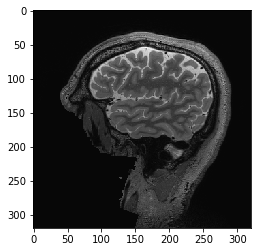

In [4]:
plt.imshow(img_array[2054, :, :], cmap='gray') # Show random sample
plt.show()

In [28]:
ft_img_array = np.fft.fftshift(np.fft.fft2(img_array, axes=(1, 2)), axes=(1, 2))

# Undersample the Fourier Transform and add low-frequencies
# 4% of 320 ~ 16 lines of low-freqeuncy k-space about center
ft_img_array_undersampled = np.copy(ft_img_array)
ft_img_array_undersampled[:, 0:152:2, :] = 0
ft_img_array_undersampled[:, 168::2, :] = 0

# Aliased reconstruction
img_array_undersampled = np.fft.fft2(ft_img_array_undersampled, axes=(1, 2))

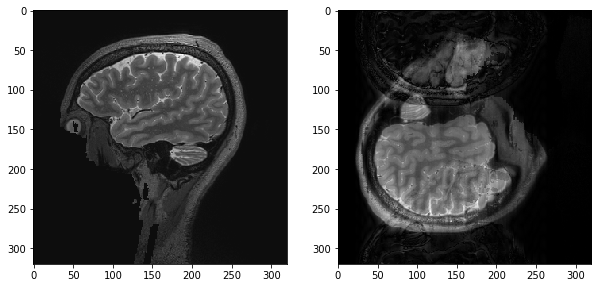

In [25]:
b = np.fliplr(img_array_undersampled)
a = (b[1234, :, :])

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(img_array[1234, :, :], cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(a), cmap='gray')

In [ ]:
plt.imshow(img_array[i, :, :])
plt.show()

In [ ]:
i = 1234
ft = ft_img_array[i, :, :]
recon = np.fft.fft2(ft)

ft_undersampled = ft_img_array_undersampled[i, :, :]
recon_undersampled = np.fft.fft2(ft_undersampled)

plt.figure(figsize=(12,10))
plt.subplot(221)
plt.imshow(np.abs(ft), vmax=10000)
plt.subplot(222)
plt.imshow(np.abs(recon), cmap='gray', )
plt.subplot(223)
plt.imshow(np.abs(ft_undersampled), vmax=10000)
plt.subplot(224)
plt.imshow(np.abs(recon_undersampled), cmap='gray', )
plt.show()

In [ ]:
np.save('./ground_truth.npy', img_array)
np.save('./input.npy', )

In [ ]:
gt = np.load('./ground_truth.npy')
ip = np.load('./input.npy')

In [ ]:
plt.figure(figsize=(6,4))
plt.subplot(121)
plt.imshow(np.abs(gt[0, :, :]))
plt.subplot(122)

plt.imshow(np.flipud(np.fliplr(np.abs(ip[0, :, :]))))
plt.show()